In [1]:
import logging

from gensim.models import word2vec

model = word2vec.Word2Vec.load("/home/cent/kaikeba/assignment/NewsSpeechExtraction/word2vec.model")

In [2]:
import os
from pyltp import Postagger

words_prob = {'说':1}#单词及权重
searched_words = {}#已搜索列表
pendding_search_words = ['说']#待搜索列表

LTP_DATA_DIR = 'ltp_data_v3.4.0/'  # ltp模型目录的路径
pos_model_path = os.path.join(LTP_DATA_DIR, 'pos.model')  # 词性标注模型路径，模型名称为`pos.model`
postagger = Postagger() # 初始化实例
postagger.load(pos_model_path)  # 加载模型
def get_similar_word():
    input_word = pendding_search_words.pop(0)#待搜索列表里第一个单词
    if(input_word not in searched_words):#如果没有被搜索过
        search_results = model.similar_by_word(input_word,topn=10)#从模型搜索同义词
        print(input_word)
        print(search_results)
        searched_words[input_word] = search_results#保存到已搜索列表
        
        for search_result in search_results:#对每个同义词
            if(search_result[0] not in words_prob):#如果以前没有出现过
                postags = postagger.postag([search_result[0]])  # 词性标注
                if(postags[0] == 'v'):# 只查询动词 
                    words_prob[search_result[0]] = words_prob[input_word] * search_result[1] 
                    pendding_search_words.append(search_result[0])
            else:
                words_prob[search_result[0]] += words_prob[input_word] * search_result[1] 
        if(len(words_prob) < 500):
            get_similar_word()
    

In [3]:
get_similar_word()
parser.release()  # 释放模型

/home/cent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  from ipykernel import kernelapp as app


说
[('说道', 0.7198472023010254), ('认为', 0.6401793956756592), ('指出', 0.632429838180542), ('所说', 0.626298725605011), ('告诉', 0.6168786883354187), ('时说', 0.6081933975219727), ('讲', 0.597043514251709), ('要说', 0.5930789113044739), ('声称', 0.5928143858909607), ('反问', 0.5923663377761841)]
说道
[('写道', 0.7881283164024353), ('说', 0.7198472023010254), ('谈到', 0.6641198992729187), ('告诉', 0.6565727591514587), ('问道', 0.6128819584846497), ('答道', 0.5990068316459656), ('指出', 0.593713104724884), ('提到', 0.5779445767402649), ('感叹', 0.5743627548217773), ('时说', 0.5722288489341736)]
认为
[('指出', 0.7681525349617004), ('普遍认为', 0.7006161212921143), ('相信', 0.6823351979255676), ('声称', 0.6573304533958435), ('说', 0.6401793956756592), ('看来', 0.6312605142593384), ('觉得', 0.6283183693885803), ('批评', 0.6159254908561707), ('指责', 0.6024337410926819), ('宣称', 0.6008021235466003)]
指出
[('声称', 0.7703320384025574), ('认为', 0.7681525349617004), ('宣称', 0.709352970123291), ('表示', 0.6955270171165466), ('表明', 0.687725841999054), ('写道', 0.668

转告
[('转达', 0.7653798460960388), ('嘱咐', 0.7205060124397278), ('面见', 0.6953753232955933), ('叮嘱', 0.6944388151168823), ('写信', 0.6877906918525696), ('责问', 0.6863159537315369), ('禀告', 0.6857456564903259), ('说情', 0.6847013235092163), ('应允', 0.6719439029693604), ('禀报', 0.6710623502731323)]
说话
[('口气', 0.6218773722648621), ('害羞', 0.6186115145683289), ('语调', 0.6183106899261475), ('骂人', 0.6004058718681335), ('语尾', 0.5924501419067383), ('嘴巴', 0.5913692712783813), ('挖苦', 0.5899825692176819), ('放屁', 0.5858702063560486), ('表情', 0.5848062038421631), ('走路', 0.5847377181053162)]
谈论
[('谈及', 0.7176929116249084), ('谈到', 0.643126368522644), ('探讨', 0.6282473802566528), ('讨论', 0.6157655119895935), ('议论', 0.6148215532302856), ('争辩', 0.5733206272125244), ('深入探讨', 0.5538410544395447), ('聊', 0.5534487366676331), ('关乎', 0.5405316352844238), ('谈话', 0.533918559551239)]
聊
[('打麻将', 0.6206043362617493), ('喝茶', 0.6150502562522888), ('吃饭', 0.612761914730072), ('聊天', 0.6057810187339783), ('闲聊', 0.6022857427597046), ('玩游戏'

赞叹
[('感叹', 0.7601818442344666), ('惊叹', 0.7383543848991394), ('感慨', 0.7310171127319336), ('动容', 0.7180613279342651), ('佩服', 0.7139386534690857), ('慨叹', 0.6868261098861694), ('惋惜', 0.6765654683113098), ('惭愧', 0.6758543848991394), ('称颂', 0.672882080078125), ('敬佩', 0.6693277955055237)]
叹
[('悔', 0.6815487146377563), ('感叹', 0.6793116927146912), ('慨叹', 0.6733064651489258), ('嗟', 0.6726792454719543), ('惆怅', 0.6682516932487488), ('岂', 0.6643645763397217), ('自谓', 0.6586340665817261), ('不闻', 0.6549264192581177), ('忧', 0.6545310020446777), ('何忍', 0.6504576802253723)]
惊叹
[('赞叹', 0.7383543848991394), ('欣喜', 0.6830240488052368), ('动容', 0.6740244626998901), ('佩服', 0.6624006628990173), ('感叹', 0.6572717428207397), ('惊讶', 0.65538090467453), ('吃惊', 0.631986141204834), ('惋惜', 0.6318928599357605), ('感慨', 0.6296982169151306), ('耳目一新', 0.6224742531776428)]
确信
[('相信', 0.7182604074478149), ('深信', 0.6949723362922668), ('坚信', 0.6878886222839355), ('断定', 0.6736016273498535), ('断言', 0.6351644992828369), ('认清', 0.62

表态
[('回应', 0.6334766745567322), ('提出异议', 0.6038117408752441), ('退选', 0.6034159064292908), ('发言', 0.6003386974334717), ('承认错误', 0.5971349477767944), ('重申', 0.5958886742591858), ('发表声明', 0.591004490852356), ('表示', 0.5873972177505493), ('表示遗憾', 0.5799704790115356), ('提出抗议', 0.5657091736793518)]
显示
[('表明', 0.6739262938499451), ('判读', 0.5497730374336243), ('标示', 0.5430364608764648), ('图表', 0.5428270101547241), ('结果显示', 0.5414599180221558), ('辨识', 0.5327892303466797), ('标注', 0.5244316458702087), ('标示出', 0.5214271545410156), ('反映', 0.5167229175567627), ('指出', 0.511502742767334)]
证实
[('确认', 0.7851800918579102), ('表明', 0.6240071654319763), ('查证', 0.5906604528427124), ('证明', 0.5905123353004456), ('否认', 0.5810688138008118), ('发现', 0.580104649066925), ('宣称', 0.5683358907699585), ('声称', 0.5655856132507324), ('确定', 0.5636682510375977), ('澄清', 0.5557714104652405)]
暗示
[('暗喻', 0.6470063924789429), ('暗指', 0.6199090480804443), ('揭示', 0.6110121607780457), ('嘲讽', 0.6004801392555237), ('解释', 0.5839042663574

责怪
[('埋怨', 0.806167483329773), ('责备', 0.8007293939590454), ('痛骂', 0.7728940844535828), ('怒骂', 0.7581283450126648), ('数落', 0.7575914263725281), ('责问', 0.7572510838508606), ('放过', 0.754949688911438), ('怪责', 0.7487730383872986), ('责骂', 0.7480010390281677), ('怒斥', 0.7391635775566101)]
并不认为
[('并不知道', 0.6653314232826233), ('确信', 0.5987154245376587), ('从来不', 0.5968894362449646), ('坚称', 0.579870343208313), ('深信', 0.5732415318489075), ('坚信', 0.569634735584259), ('始终认为', 0.5670250654220581), ('却说', 0.564282238483429), ('他称', 0.5559121966362), ('地指', 0.5476199388504028)]
认出
[('抓到', 0.7377064228057861), ('吓坏', 0.7030555009841919), ('撞见', 0.6994908452033997), ('放走', 0.6919025182723999), ('碰见', 0.6884850263595581), ('打昏', 0.6865378022193909), ('察觉到', 0.6763429045677185), ('捉住', 0.6742386221885681), ('救下', 0.6704380512237549), ('骗过', 0.6679450869560242)]
察觉到
[('察觉', 0.7770431041717529), ('发觉', 0.7228608131408691), ('知晓', 0.6828112006187439), ('认出', 0.6763428449630737), ('查觉到', 0.6703072190284729), ('

自述
[('忆述', 0.6566058397293091), ('亲身经历', 0.6450035572052002), ('自序', 0.6416781544685364), ('姜贵', 0.6120137572288513), ('回忆录', 0.6004802584648132), ('自传', 0.5961920022964478), ('口述', 0.5825805068016052), ('钱钟书', 0.579353928565979), ('序文', 0.5721564292907715), ('周作人', 0.5708775520324707)]
讲完
[('说完', 0.7862779498100281), ('几句', 0.5919046401977539), ('读完', 0.579975426197052), ('酒醒', 0.5640100836753845), ('半句', 0.5626935362815857), ('讲出', 0.5459676384925842), ('喝了酒', 0.53102707862854), ('唸完', 0.5309761166572571), ('谈完', 0.5292408466339111), ('想到', 0.528405487537384)]
反指
[('辩称', 0.7005196809768677), ('直斥', 0.686468780040741), ('指摘', 0.6720333099365234), ('痛骂', 0.6624550819396973), ('狠批', 0.6464188694953918), ('怒斥', 0.6381058692932129), ('反问', 0.6367003321647644), ('摆平', 0.6315141320228577), ('暗讽', 0.6291233897209167), ('推卸责任', 0.6290489435195923)]
供称
[('坦承', 0.7032970786094666), ('举发', 0.6841261982917786), ('指证', 0.6817055940628052), ('谎称', 0.6809367537498474), ('案发后', 0.6779463887214661), (

NameError: name 'parser' is not defined

In [4]:
len(words_prob)

501

In [5]:
words_prob

{'说': 9.16730307170364,
 '说道': 3.6529097007389035,
 '认为': 6.152664845079746,
 '指出': 33.75995172778463,
 '告诉': 3.9482705933844437,
 '讲': 0.7325703903165917,
 '声称': 37.630763031325266,
 '反问': 27.95540289061374,
 '写道': 4.638112715929838,
 '谈到': 12.06484964481046,
 '问道': 8.036633036506656,
 '答道': 28.30935203062477,
 '提到': 25.163180756956002,
 '感叹': 3.511989634860549,
 '相信': 12.314552066817319,
 '看来': 0.5548737633117954,
 '觉得': 1.1561577122784372,
 '批评': 17.923992068019057,
 '指责': 82.77292190546362,
 '宣称': 24.70505177598272,
 '表示': 30.999370595441633,
 '表明': 16.141236299313423,
 '引述': 17.378376029295126,
 '强调': 13.045057263518455,
 '告知': 6.821976583246943,
 '询问': 24.804464562636156,
 '质问': 23.042628870743258,
 '知道': 2.9308538043959196,
 '告诫': 6.234752906579198,
 '并不知道': 1.8052203906689783,
 '转告': 6.112776121200989,
 '说话': 0.5230288093327262,
 '谈论': 6.785312087094999,
 '聊': 2.94671500178969,
 '谈': 0.6410732839896014,
 '说起': 1.7261624059730865,
 '辩称': 22.610425867302567,
 '坚称': 22.45815802124

In [6]:
sorted(words_prob.items(), key=lambda d:d[1], reverse = True)

[('怒斥', 96.19039405119064),
 ('斥责', 90.2779514576218),
 ('诋毁', 84.07098641610203),
 ('指责', 82.77292190546362),
 ('反驳', 70.91730081520635),
 ('否认', 70.3617745760292),
 ('污蔑', 65.71617209451112),
 ('责问', 64.1522224476895),
 ('痛斥', 59.766755334130394),
 ('羞辱', 57.235549753399624),
 ('诬蔑', 52.44158862444414),
 ('驳斥', 52.32357439254245),
 ('指斥', 46.33230527479198),
 ('责备', 46.10517421105506),
 ('数落', 40.0807594263204),
 ('责骂', 39.828009675541374),
 ('声称', 37.630763031325266),
 ('抨击', 37.345937405039564),
 ('回应', 36.670971514920616),
 ('批驳', 35.837109821806784),
 ('指出', 33.75995172778463),
 ('责怪', 31.107075380174987),
 ('表示', 30.999370595441633),
 ('声讨', 28.712447253880306),
 ('回覆', 28.6295064027676),
 ('侮辱', 28.5432290975018),
 ('训斥', 28.494078417754107),
 ('答道', 28.30935203062477),
 ('反问', 27.95540289061374),
 ('惩办', 26.662892475488096),
 ('埋怨', 25.224520277796778),
 ('提到', 25.163180756956002),
 ('询问', 24.804464562636156),
 ('宣称', 24.70505177598272),
 ('道歉', 24.262057639460025),
 ('放过', 23

In [7]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load("word2vec.model")

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import logging


logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

labels = []
tokens = []

for word in words_prob.keys():
    tokens.append(model[word])
    labels.append(word)
    
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])


/home/cent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [9]:
import matplotlib.font_manager as font_manager; font_manager._rebuild()

plt.rcParams['font.sans-serif'] = ['SimHei']

2019-09-12 08:36:50,884 : INFO : font search path ['/home/cent/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf', '/home/cent/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/afm', '/home/cent/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
2019-09-12 08:36:52,068 : INFO : generated new fontManager


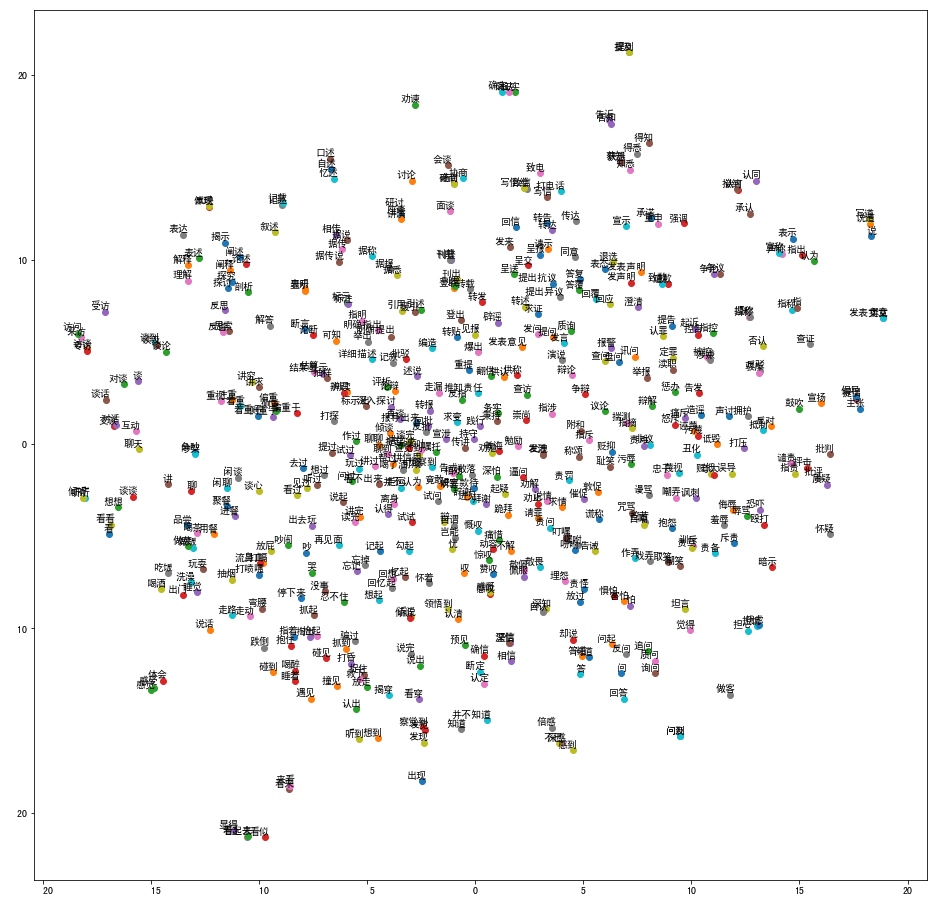

In [29]:
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

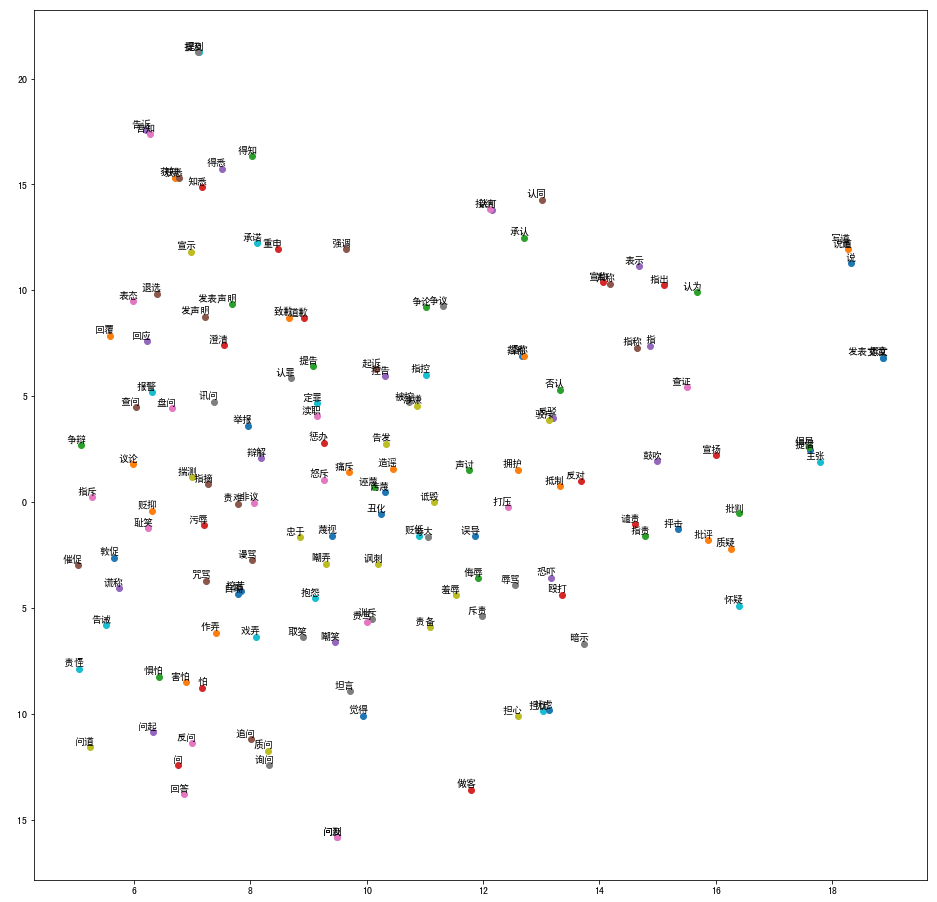

In [30]:
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    if(x[i] < 20 and x[i] > 5 ):##and y[i] > -10 and y[i] < 10
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')
#plt.show()

In [31]:
final_words = []
for i,word in enumerate(words_prob.keys()):
    if(x[i] < 20 and x[i] > 5 ):
    #if(x[i] < 10 and x[i] > -10 and y[i] > -10 and y[i] < 10):
        final_words.append(word)

In [41]:
except_words = ['退选','惧怕','害怕','怕','催促','定罪','渎职','惩办','丑化','做客','拥护','抵制','反对']
for except_word in except_words:
    if(except_word in final_words):
        final_words.remove(except_word)

In [42]:
len(final_words)

134

In [43]:
import pickle
with open('words_similar_to_say','wb') as f:
    pickle.dump(final_words,f)

In [44]:
test_words = []
with open('words_similar_to_say','rb') as f:
    test_words = pickle.load(f)
len(test_words)

134